In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [165]:
%run 'Functions.ipynb'

In [11]:
chunks = [('S'+str(x)) for x in range(1,13)]
true = {}
predicted = {}
fitness_potential = {}
hist = {}

large_weights_1 = {}
large_weights_2 = {}
large_weights_3 = {}

large_biases_1 = {}
large_biases_2 = {}
large_biases_3 = {}

uni_weights = {}
uni_biases = {}

# 1-neuron

In [21]:
for chunk in chunks:
    print (chunk)
    data, labels = read_data(chunk)
    
    model = Sequential()
    model.add(Dense(1, activation='sigmoid', input_dim=data.shape[1], kernel_initializer='random_uniform'))
    model.add(Dense(10, activation='sigmoid', kernel_initializer='random_uniform'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='random_uniform'))

    model.compile(optimizer='adagrad',
                  loss='mean_squared_error',
                  verbose=0)
    
    hist[chunk] = model.fit(data, labels, epochs=500, batch_size=500, shuffle=True, verbose=0)
    proba = model.predict_proba(data, batch_size=500, verbose=0)
    
    uni_weights[chunk] = model.layers[0].get_weights()[0]
    uni_biases[chunk] = model.layers[0].get_weights()[1]

    
    true[chunk] = labels
    predicted[chunk] = proba.flatten()
    fitness_potential[chunk] = data.dot(uni_weights[chunk])

S1
S2
S3
S4
S5
S6
S7
S8
S9
S10
S11
S12


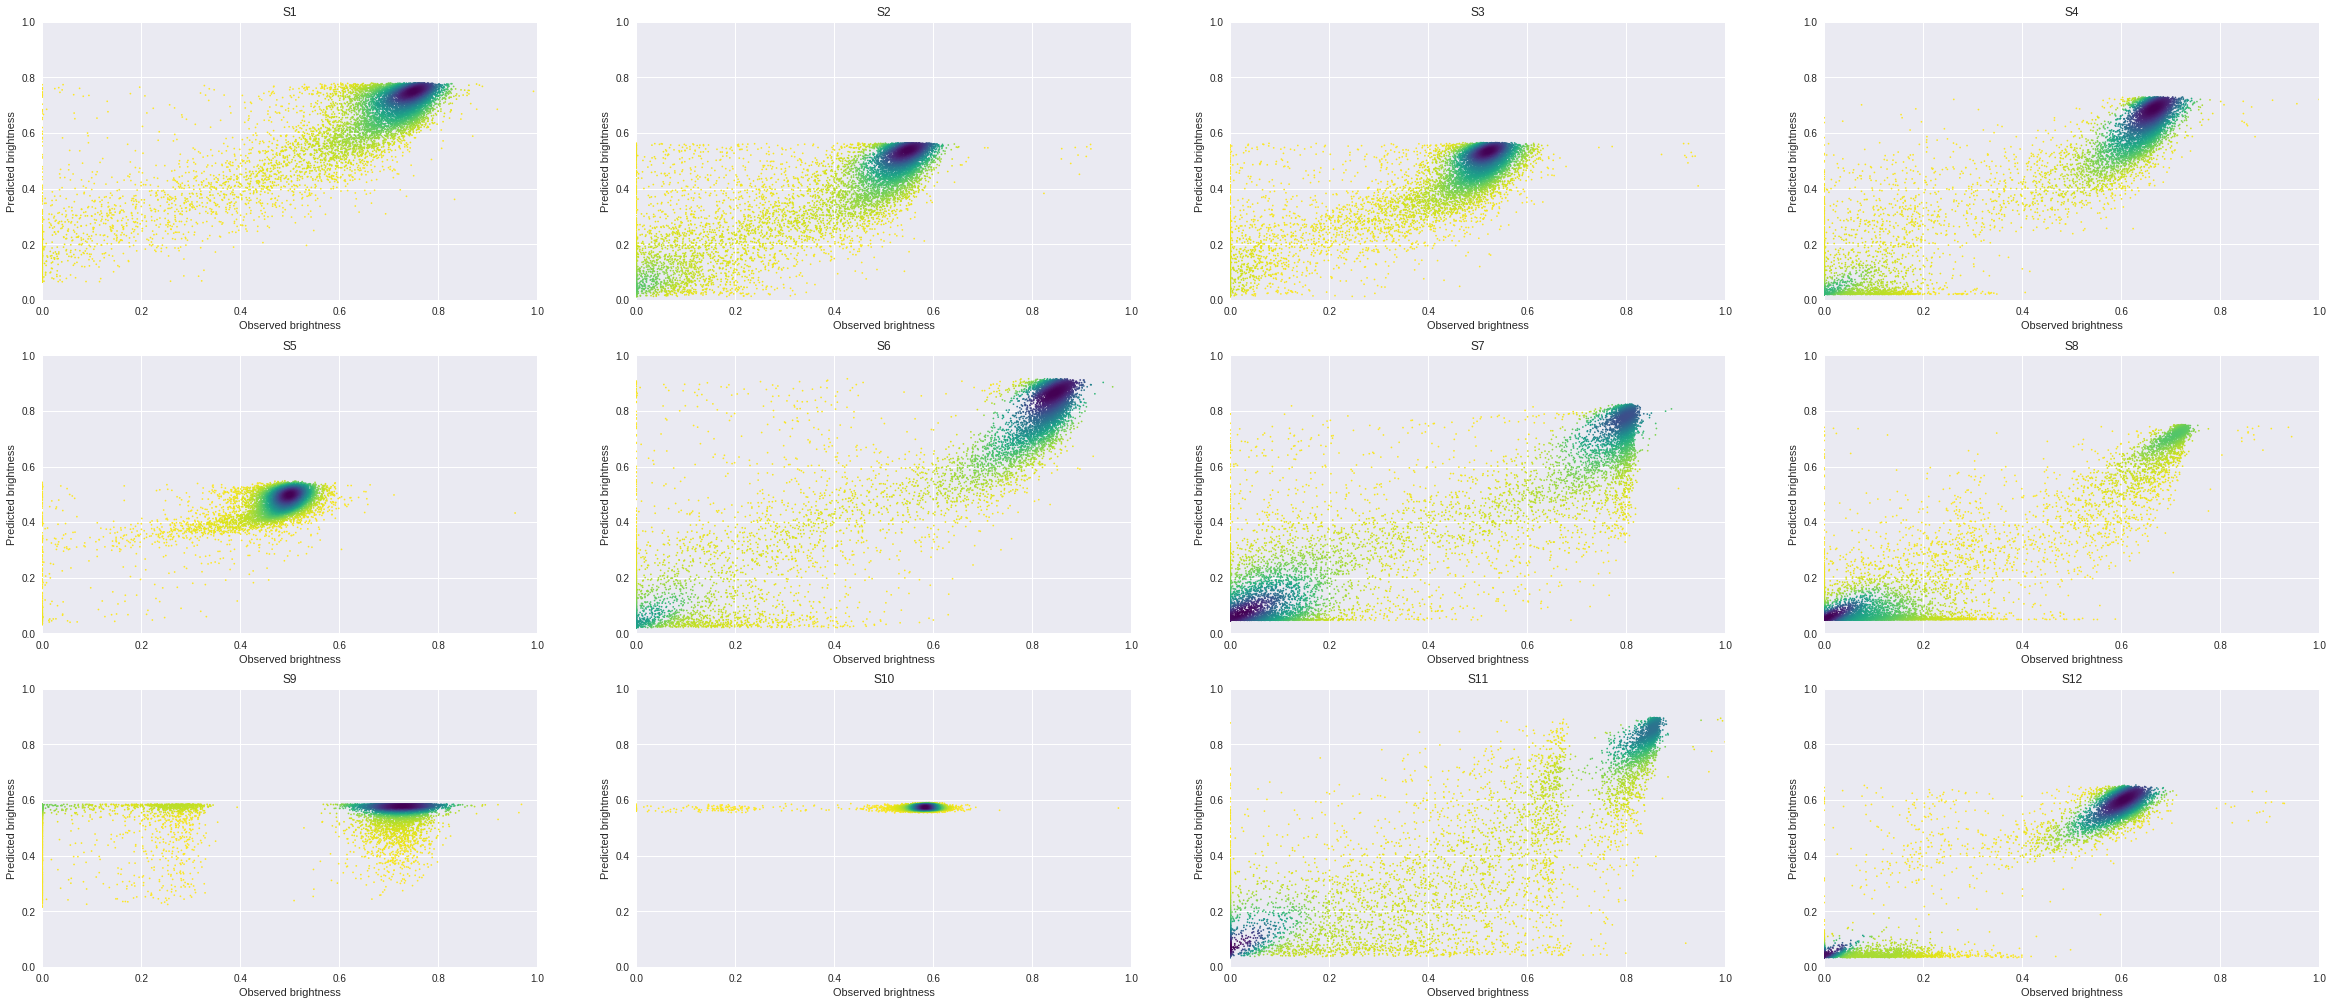

In [22]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)
    plt.ylim(0,1)
    plt.xlim(0,1)
    density_plot(true[chunk][:10000], predicted[chunk][:10000])
    count+=1

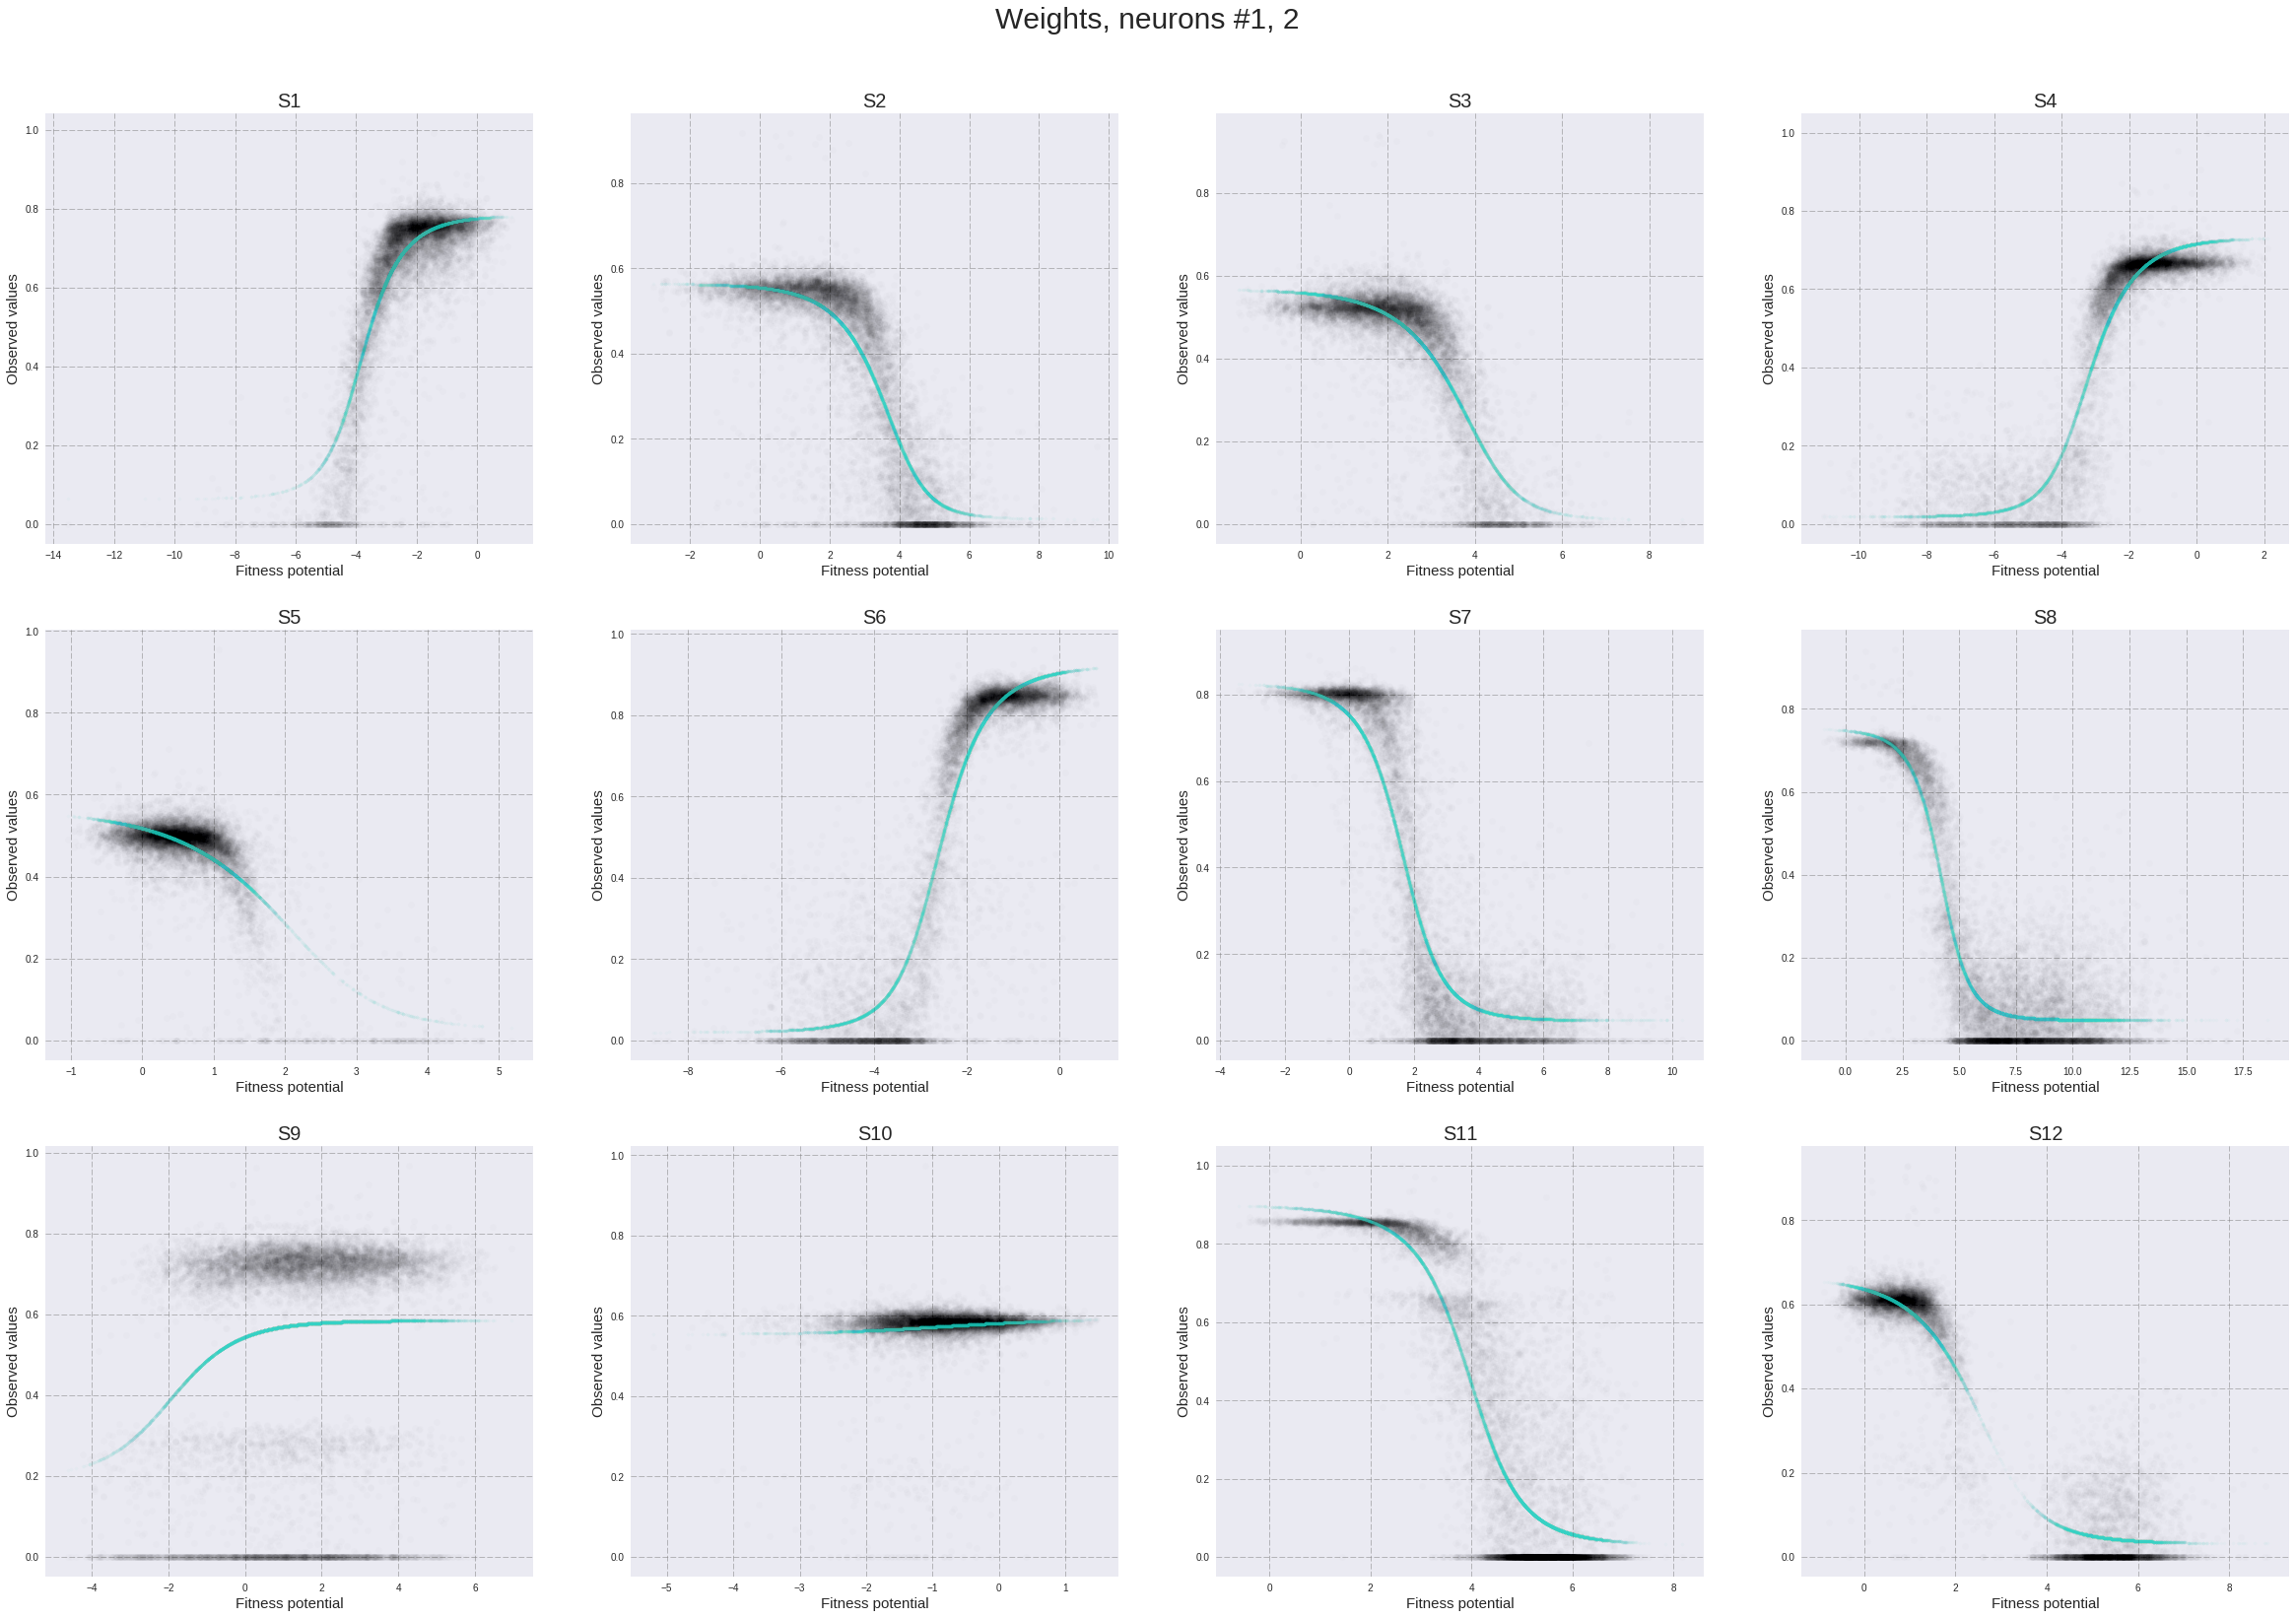

In [25]:
fitness_potential_plotting(0)

# 2-neurons

In [95]:
for chunk in chunks:
    print (chunk)
    data, labels = read_data(chunk)
    
    model = Sequential()
    model.add(Dense(2, activation='sigmoid', input_dim=data.shape[1], kernel_initializer='random_uniform'))
    model.add(Dense(50, activation='sigmoid', kernel_initializer='random_uniform'))
    model.add(Dense(50, activation='sigmoid', kernel_initializer='random_uniform'))
    model.add(Dense(50, activation='sigmoid', kernel_initializer='random_uniform'))
    model.add(Dense(50, activation='sigmoid', kernel_initializer='random_uniform'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='random_uniform'))

    model.compile(optimizer='adagrad',
                  loss='mean_squared_error',
                  verbose=0)
    
    hist[chunk] = model.fit(data, labels, epochs=500, batch_size=500, shuffle=True, verbose=0)
    proba = model.predict_proba(data, batch_size=500, verbose=0)
    
    large_weights_1[chunk] = model.layers[0].get_weights()[0]
    large_weights_2[chunk] = model.layers[1].get_weights()[0]
    large_weights_3[chunk] = model.layers[2].get_weights()[0]
    
    large_biases_1[chunk] = model.layers[0].get_weights()[1]
    large_biases_2[chunk] = model.layers[1].get_weights()[1]
    large_biases_3[chunk] = model.layers[2].get_weights()[1]
    
    true[chunk] = labels
    predicted[chunk] = proba.flatten()
    fitness_potential[chunk] = data.dot(large_weights_1[chunk])

S1
S2
S3
S4
S5
S6
S7
S8
S9
S10
S11
S12


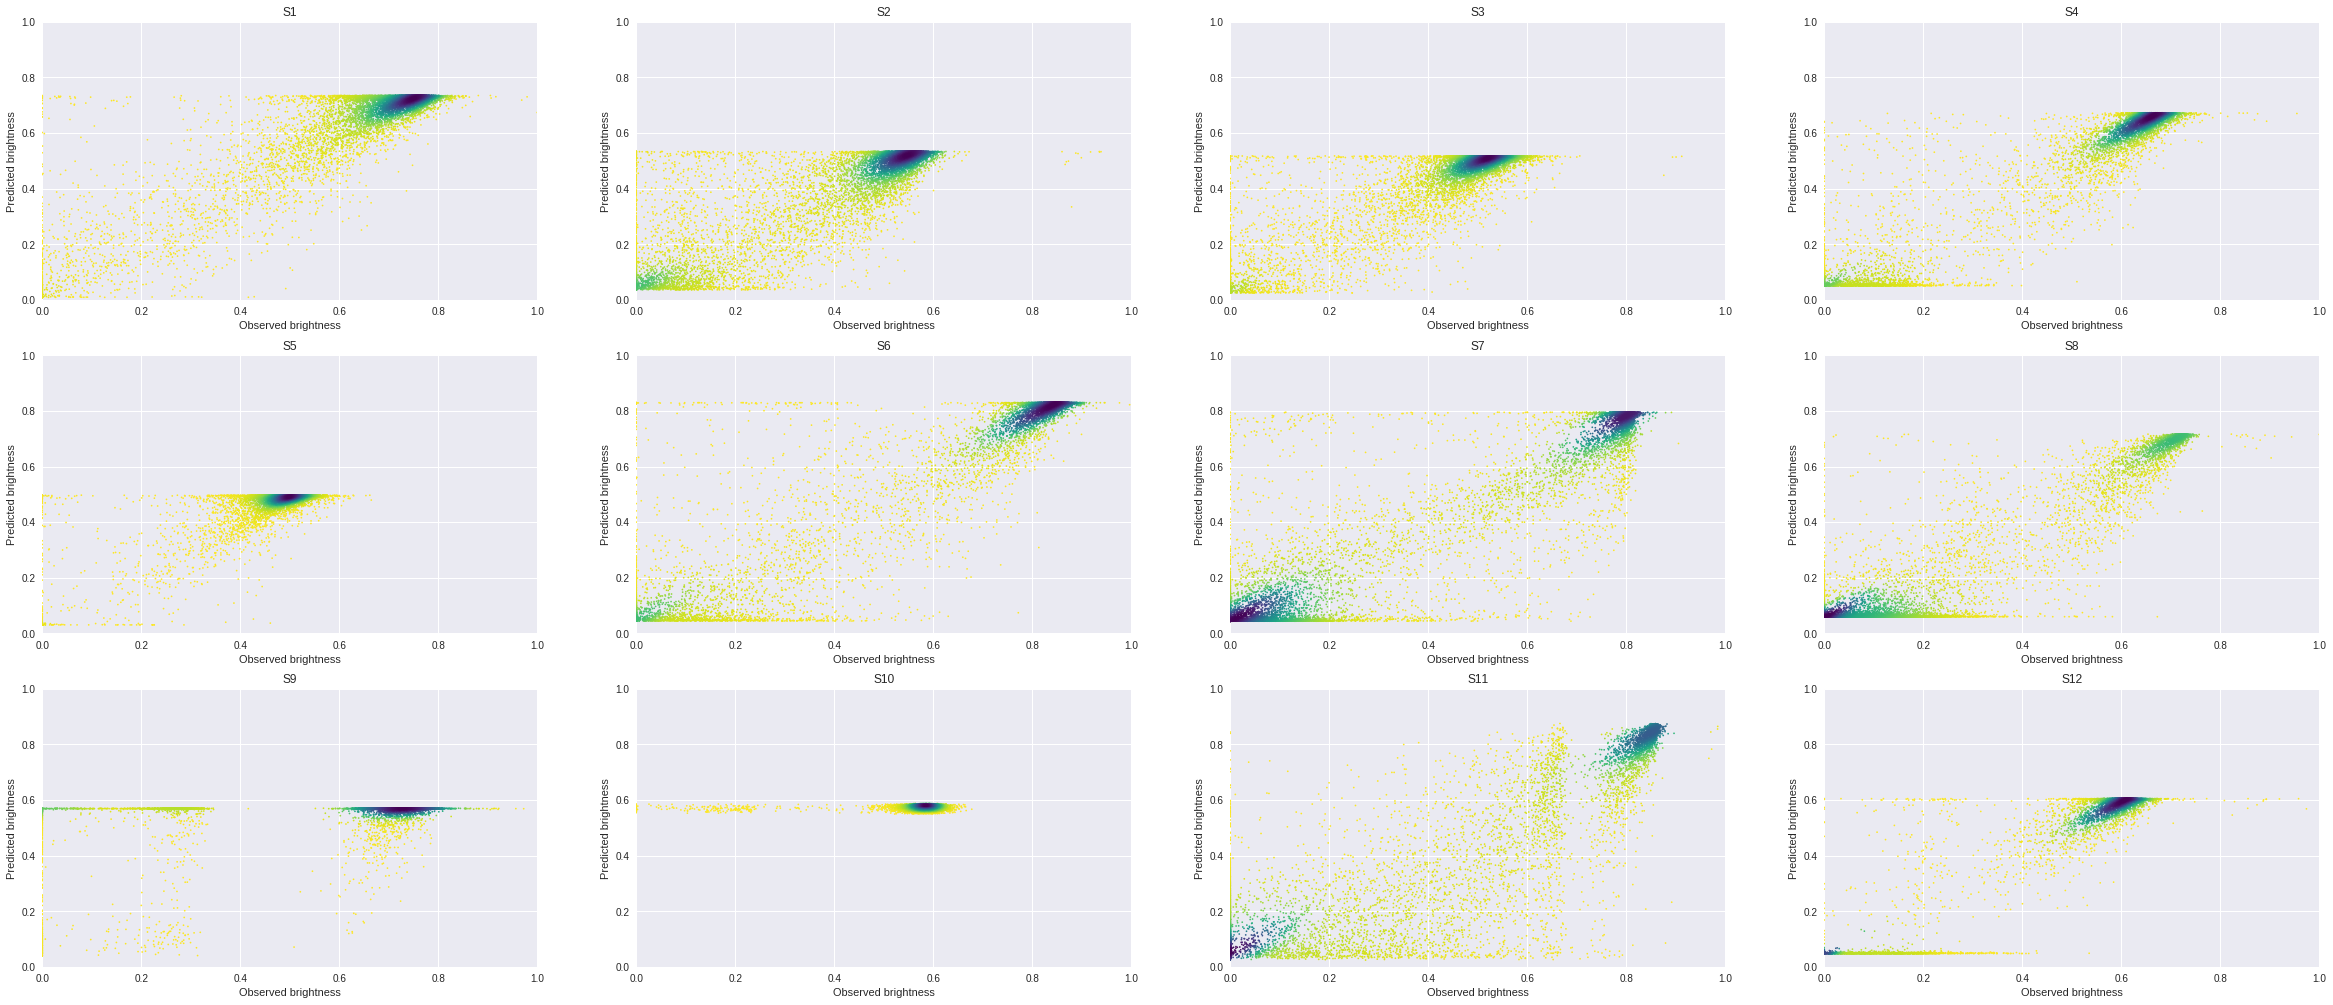

In [96]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)
    plt.ylim(0,1)
    plt.xlim(0,1)
    density_plot(true[chunk][:10000], predicted[chunk][:10000])
    count+=1

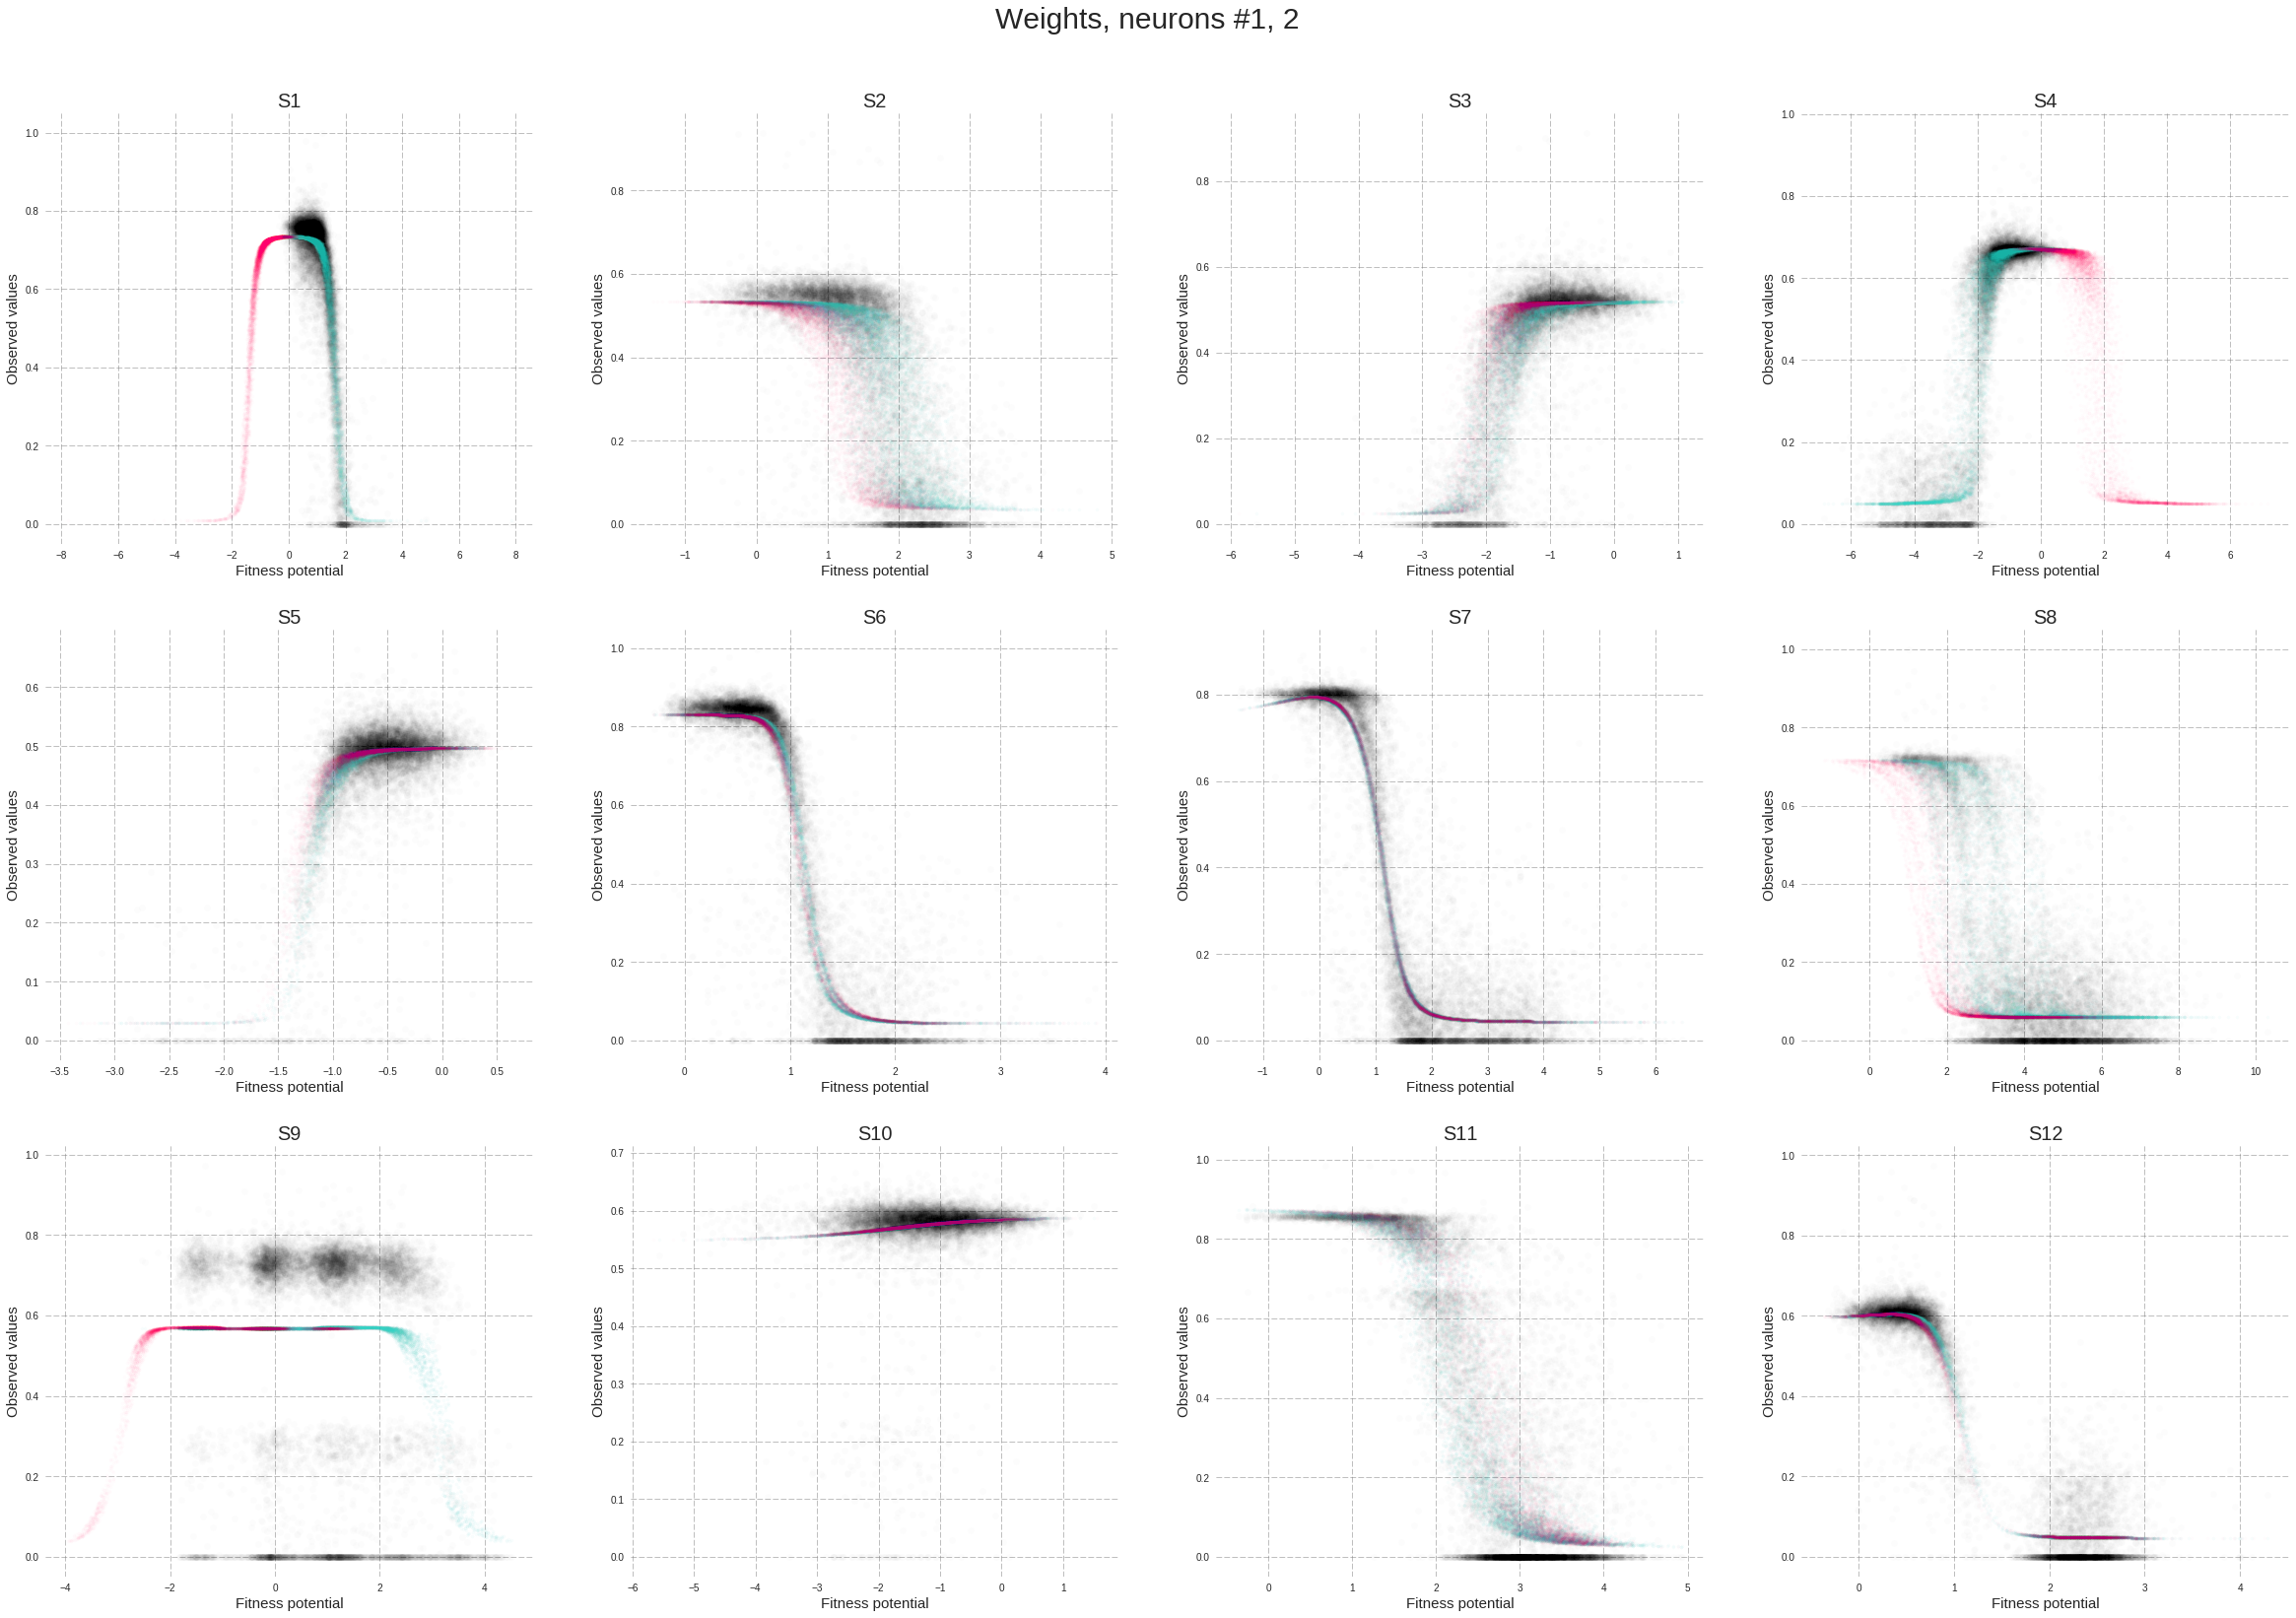

In [166]:
fitness_potential_plotting(0)

In [167]:
r2 = {}

for chunk in chunks:
    r2[chunk] = []
    for w1 in range(2):
        for w2 in range(2):
            if w1!=w2:
                slope, intercept, r_value, p_value, std_err = stats.linregress(large_weights_1[chunk][:,w1],large_weights_1[chunk][:,w2])
                r2[chunk].append(r_value)
                
data = pd.DataFrame.from_dict(r2)

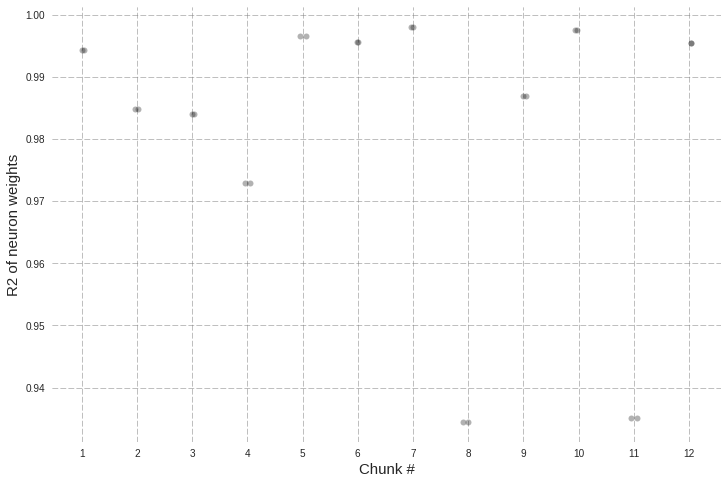

In [197]:
plt.figure(figsize=[12,8])
for i in range(1,13):
    y = data['S'+str(i)]
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'k.', alpha=0.3, ms=12)
    plt.xticks([x for x in range(1,13)])
    plt.xlabel('Chunk #', fontsize=15)
    plt.ylabel('R2 of neuron weights', fontsize=15)
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')

## Mutation weights heatmaps

In [100]:
unique_mutations = {}
for chunk in chunks:
    input_file = '/home/katya/start/HIS3InterspeciesEpistasis/Analysis/Katya/NN/data/' + chunk + '.txt'
    data = pd.read_table(input_file)
    data.mut_list = data.mut_list.fillna('')
    unique_mutations[chunk] = set(':'.join(data.mut_list).split(':'))
    unique_mutations[chunk] = sorted(list(unique_mutations[chunk] ))
    if '' in unique_mutations[chunk]:
        unique_mutations[chunk] .remove('')

In [199]:
def make_table(chunk, neuron=0):
    index = set([x[-1] for x in unique_mutations[chunk]])
    columns = set([int(x[:-1]) for x in unique_mutations[chunk]])
    df = pd.DataFrame(index=sorted(index), columns=columns).astype(float)
    
    for i in range(len(large_weights_1[chunk])):
        position = unique_mutations[chunk][i][:-1]
        mutation = unique_mutations[chunk][i][-1]
        df[int(position)][mutation] = (large_weights_1[chunk][i][neuron]).astype(float)

        
    return df

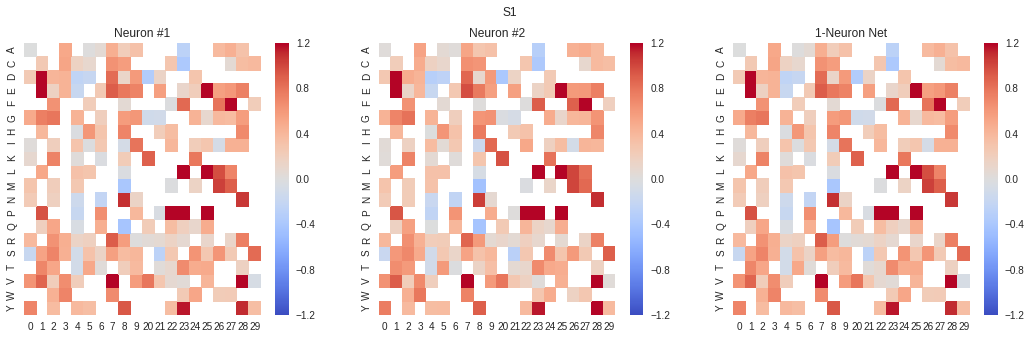

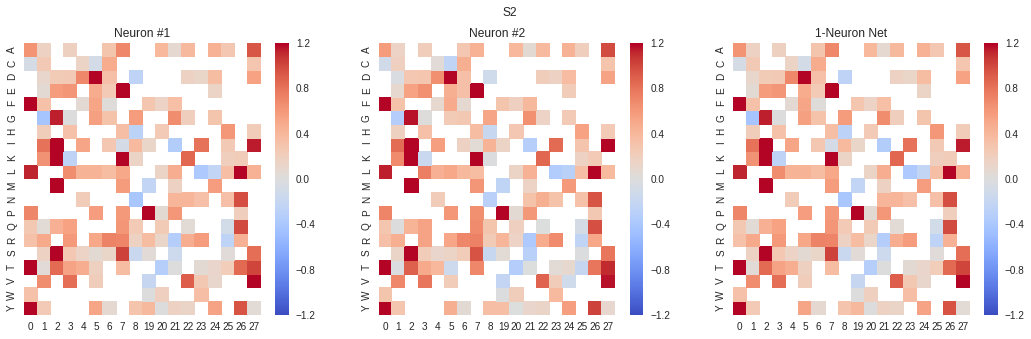

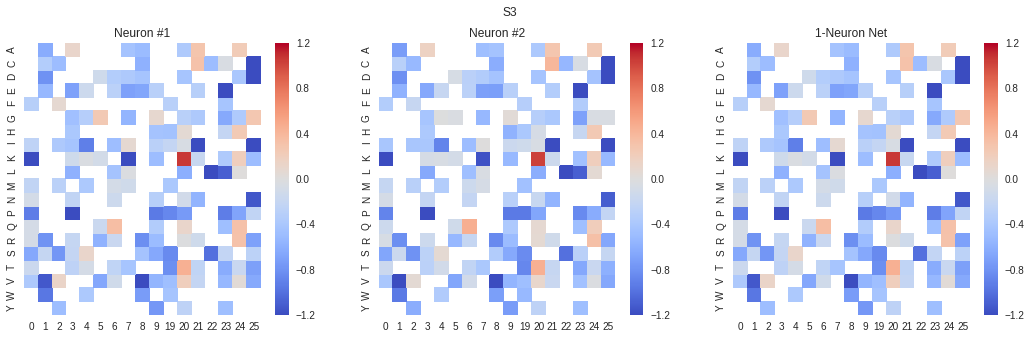

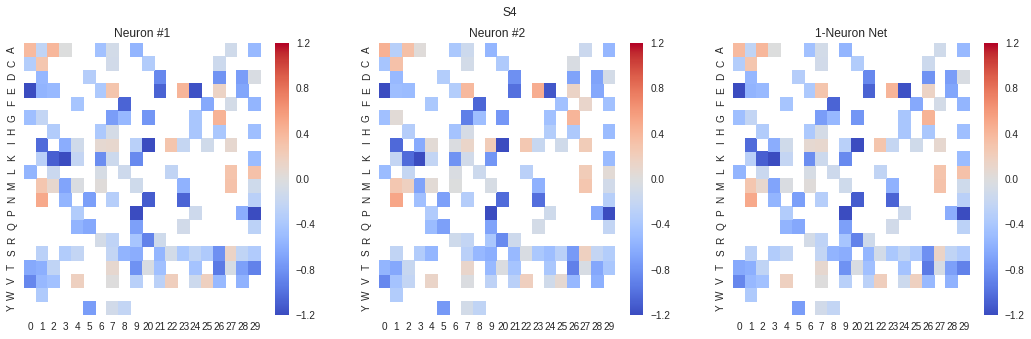

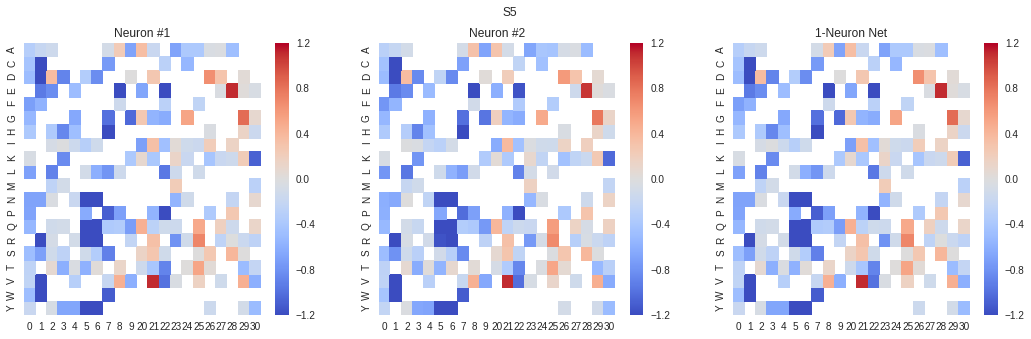

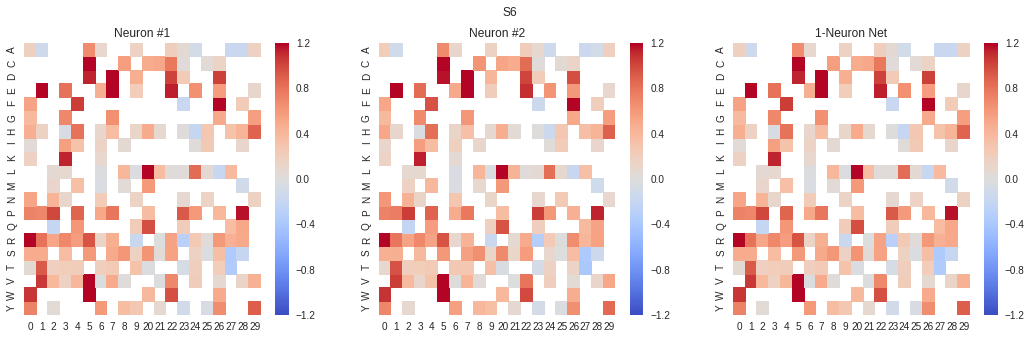

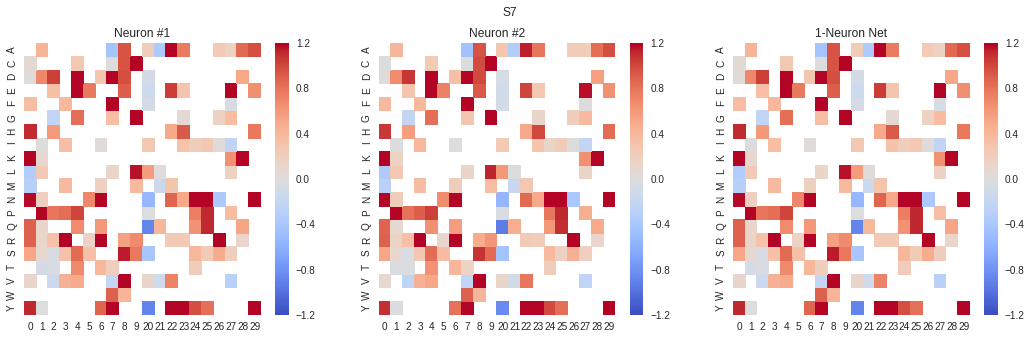

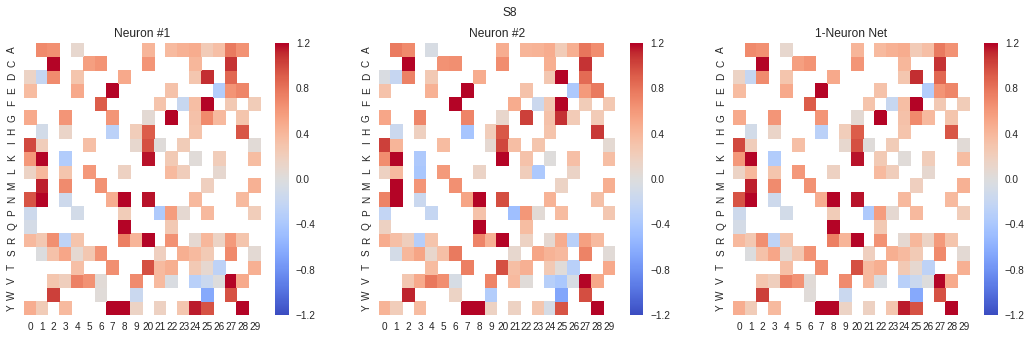

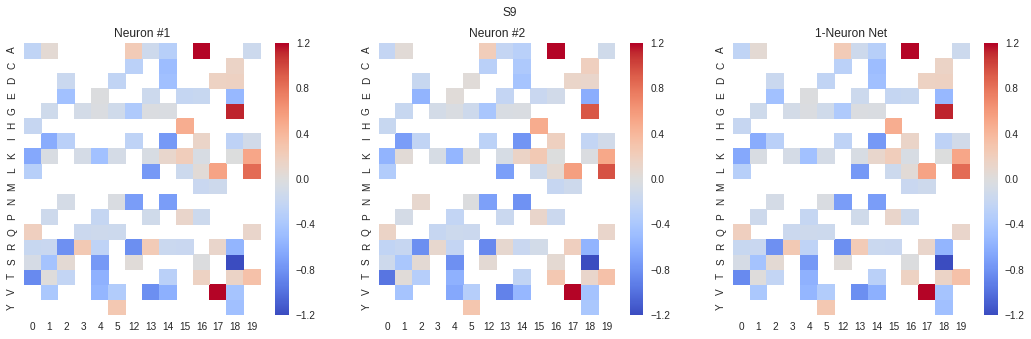

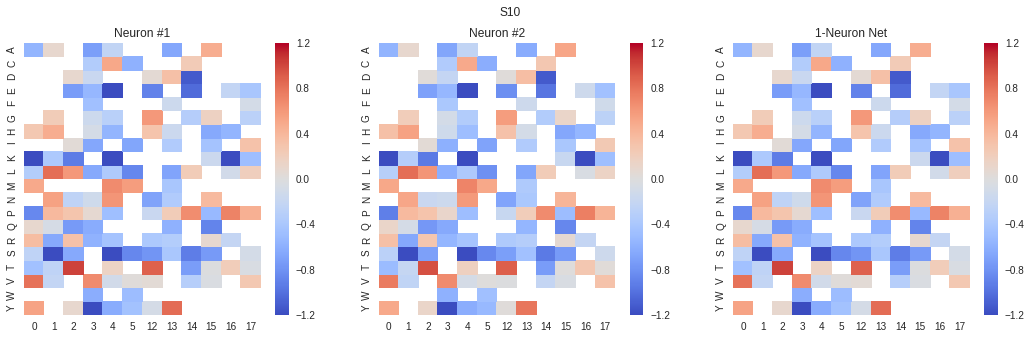

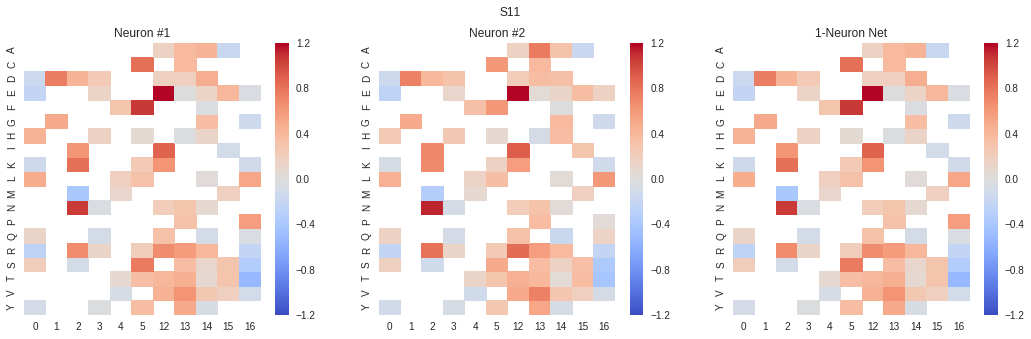

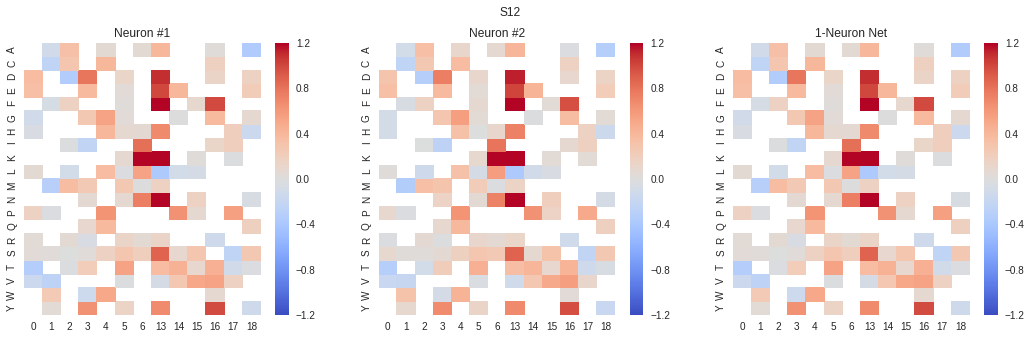

In [238]:
import seaborn as sns
plt.figure(figsize=(3*5+3,5))


for chunk in chunks: 
    plt.figure(figsize=(3*5+3,5))
    count=1
    
    for neuron in range(2):
        df = make_table(chunk, neuron)
        
        plt.subplot(1,3,count)
        sns.heatmap(df, cmap='coolwarm', mask=df.isnull(), vmin=-1., vmax=1.2)
        plt.suptitle(chunk)
        plt.title('Neuron #%d' %(neuron+1));
        count+=1
        
    df = make_table(chunk)
    
    plt.subplot(1,3,3)    
    sns.heatmap(df, cmap='coolwarm', mask=df.isnull(), vmin=-1., vmax=1.2)
    plt.suptitle(chunk)
    plt.title('1-Neuron Net');

## Looking at differences

In [242]:
differences = {}
result = {}

for chunk in chunks:
    df={}
    df[0] = make_table(chunk, neuron=0)
    df[1] = make_table(chunk, neuron=1)
    for key in df:
        df[key][df[key]>0]=1
        df[key][df[key]<0]=-1
    differences[chunk] = df[0] - df[1]
    differences[chunk]=differences[chunk].fillna(0)
    
    df[0] = make_table(chunk, neuron=0)
    df[1] = make_table(chunk, neuron=1)
    
    result[chunk] = (df[0][differences[chunk]!=0] - df[1][differences[chunk]!=0])

In [281]:
for chunk in chunks:
    print ('\n',chunk)
    for i in result[chunk].index:
        for j in result[chunk].columns:
            if result[chunk][j].ix[i]!=0:
                print (j,i,result[chunk][j].ix[i])


 S1
0 A -0.0265667065978
22 F -0.026957899332
5 I -0.0655289804563
6 K -0.0446497574449
21 P -0.0618764050305
6 T 0.0397468907759
29 V -0.090313129127

 S2
1 D 0.144881378859
7 I -0.130580872297
8 K 0.158507389948
22 Q 0.0573383462615
25 S 0.051051767543
1 T 0.0626091975719
5 T 0.318455263972
21 T 0.00908751576208
25 T 0.414615511894
24 V 0.227074190974
19 W 0.0197710557841
20 Y 0.0102677610703

 S3
2 F 0.26954908669
5 G 0.29324606806
25 G 0.310817413032
20 H 0.129074756056
20 R -0.0802226057276
24 V 0.0693228859454

 S4
3 A -0.0295004490763
27 F -0.208270676434
1 G -0.264372438192
4 I -0.161618873477
6 I 0.0944716259837
9 I -0.521010518074
4 M -0.0803328920156
6 M 0.0340358619578
7 V 0.0257773199119

 S5
23 I 0.0639047119766
2 N -0.0340708787553
25 S 0.0296284274664
29 S 0.0227732015774
4 T -0.0497441533953
24 T 0.0299413362518

 S6
21 R -0.0745090204291
6 V -0.0287978732958

 S7
7 C 0.0213820105419
27 F -0.0683184023947
6 I 0.0425513028167

 S8
4 A 0.148351222277
0 D 0.190650768578


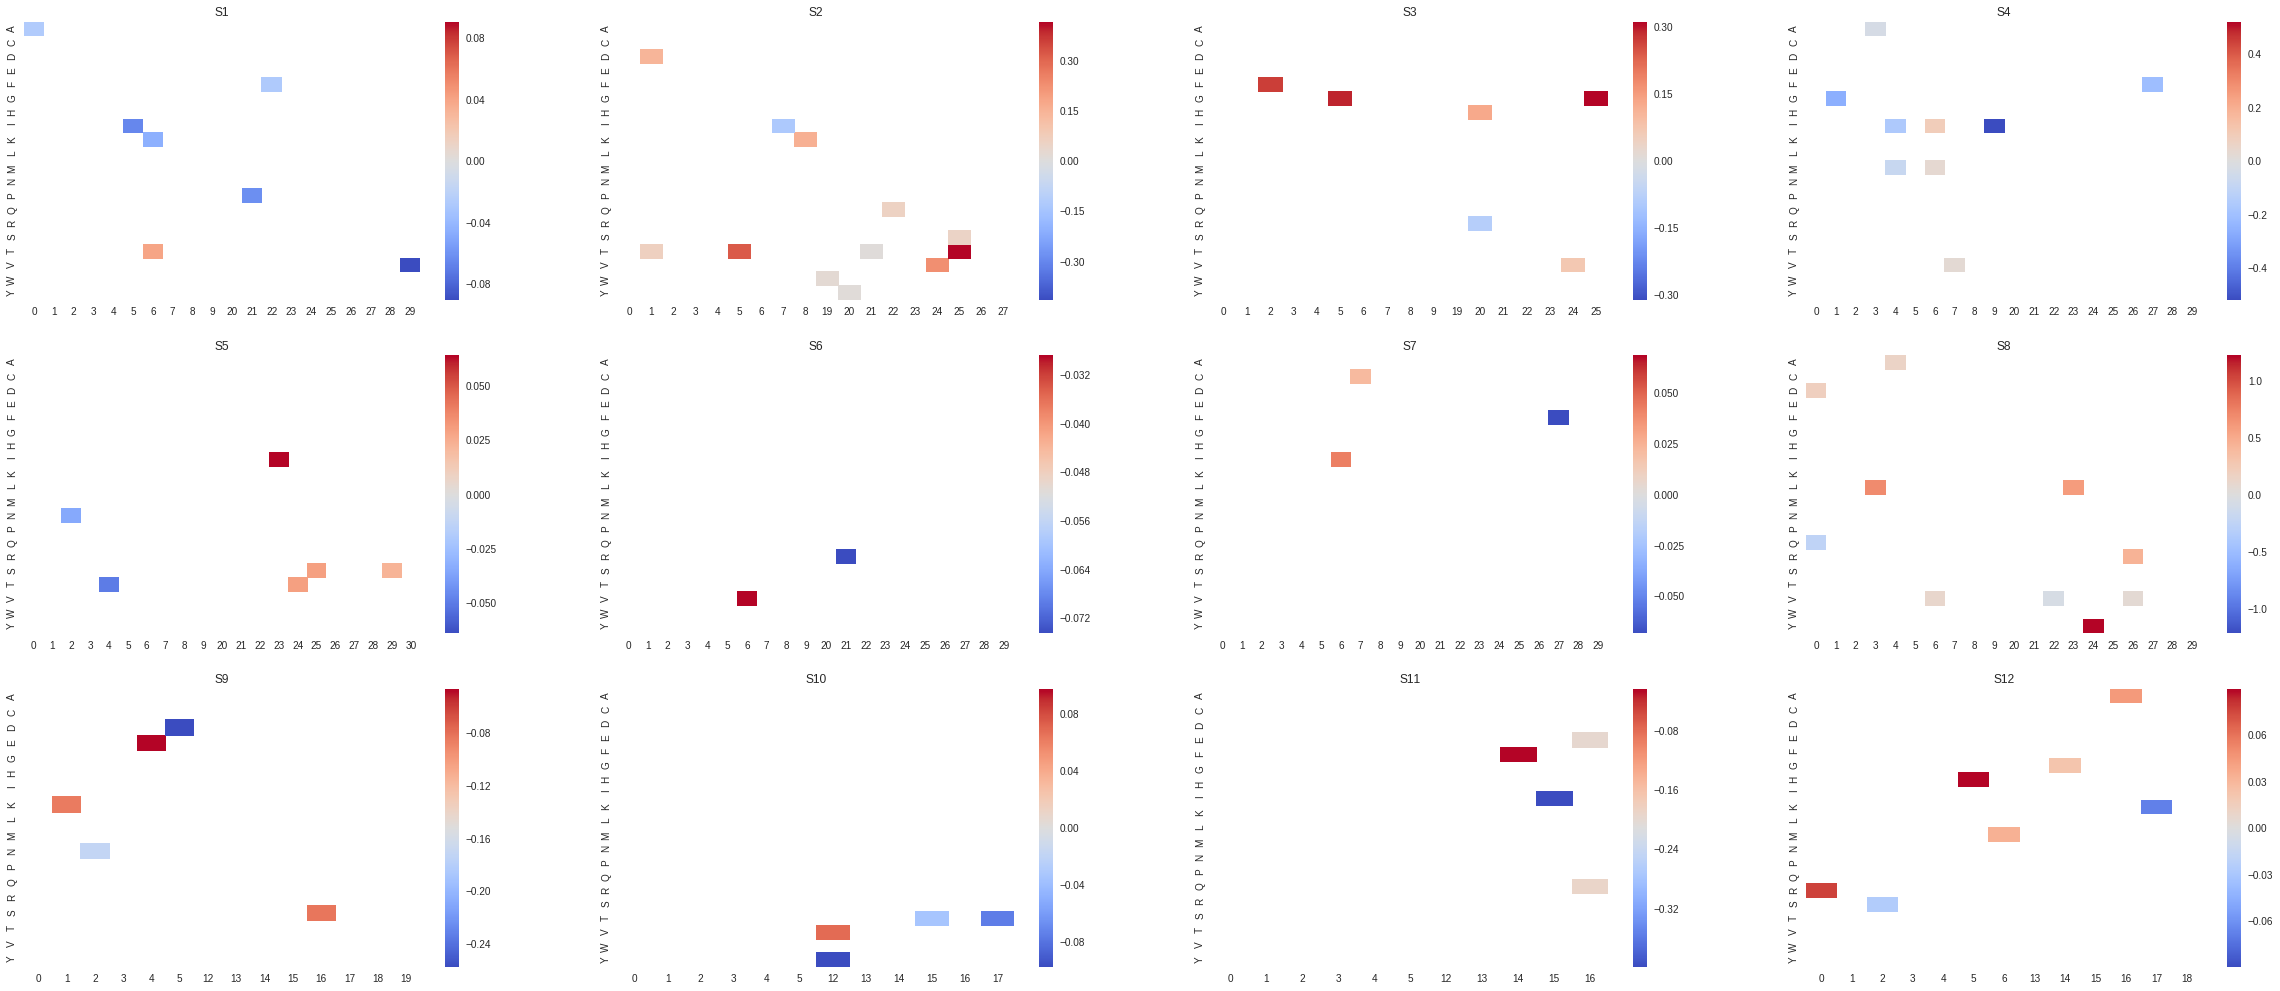

In [237]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)

    sns.heatmap(result[chunk], cmap='coolwarm')    
    count+=1
